In [12]:
import glob
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
subfolder_names = glob.glob("David_Training")

# Load the images and labels
X = []
y = []
size=(64,64)
for subfolder_name in subfolder_names:
    # Get the list of sub-subfolder names
    subsubfolder_names = glob.glob(f"{subfolder_name}/*")

    for subsubfolder_name in subsubfolder_names:
        # Get the list of sub-sub-subfolder names
        image_filenames = glob.glob(f"{subsubfolder_name}/*")


        for filename in image_filenames:
            # Load the image and convert it to grayscale
            try:
                image = Image.open(filename).convert("L")
                image=image.resize(size,Image.ANTIALIAS)
            except:
                # If there is an error, skip this image
                continue

            # Store the image and label in the arrays
            X.append(np.array(image))
            y.append(subsubfolder_name)

# Convert the arrays to NumPy arrays
train_data = np.array(X)
train_labels = np.array(y)

Extract just the number as labels

In [14]:
train_labels = [int(string[15:]) for string in train_labels]

Confirm all 27 classes exist

In [15]:
train_labels=np.array(train_labels)
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

Test Set Pull

In [16]:
# Get the list of subfolder names
# Replace "path/to/folder" with the path to the main folder
subfolder_names = glob.glob("David_Testing")

# Load the images and labels
X = []
y = []
size=(64,64)
for subfolder_name in subfolder_names:
    # Get the list of sub-subfolder names
    subsubfolder_names = glob.glob(f"{subfolder_name}/*")

    for subsubfolder_name in subsubfolder_names:
        # Get the list of sub-sub-subfolder names
        image_filenames = glob.glob(f"{subsubfolder_name}/*")


        for filename in image_filenames:
            # Load the image and convert it to grayscale
            try:
                image = Image.open(filename).convert("L")
                image=image.resize(size,Image.ANTIALIAS)
            except:
                # If there is an error, skip this image
                continue

            # Store the image and label in the arrays
            X.append(np.array(image))
            y.append(subsubfolder_name)

# Convert the arrays to NumPy arrays
test_data = np.array(X)
test_labels = np.array(y)

In [17]:
test_labels = [int(string[14:]) for string in test_labels]

In [18]:
test_labels=np.array(test_labels)
np.unique(test_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

Model Archetitecture with two Convolutional Layers, first with 64 nodes, then with 128 nodes

In [19]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(27, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=15)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/20
17/17 [==============================] - 5s 236ms/step - loss: 46.2067 - accuracy: 0.0611
Epoch 2/20
17/17 [==============================] - 4s 227ms/step - loss: 3.2893 - accuracy: 0.0537
Epoch 3/20
17/17 [==============================] - 4s 229ms/step - loss: 3.2954 - accuracy: 0.0352
Epoch 4/20
17/17 [==============================] - 4s 229ms/step - loss: 3.2934 - accuracy: 0.0352
Epoch 5/20
17/17 [==============================] - 4s 230ms/step - loss: 2.9070 - accuracy: 0.1963
Epoch 6/20
17/17 [==============================] - 4s 249ms/step - loss: 2.0387 - accuracy: 0.4741
Epoch 7/20
17/17 [==============================] - 4s 245ms/step - loss: 1.3589 - accuracy: 0.6278
Epoch 8/20
17/17 [==============================] - 4s 228ms/step - loss: 0.9315 - accuracy: 0.7259
Epoch 9/20
17/17 [==============================] - 4s 229ms/step - loss: 0.6866 - accuracy: 0.8259
Epoch 10/20
17/17 [==============================] - 4s 229ms/step - loss: 0.4616 - accuracy: 0.875

loss vs accuracy

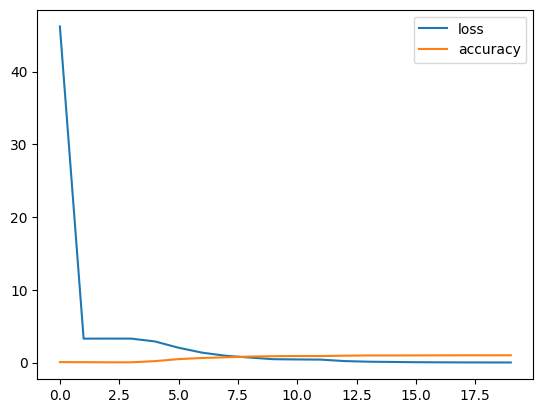

In [20]:

# Create the plot
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

# Add a legend
plt.legend(['loss', 'accuracy'])

# Show the plot
plt.show()

Individual test

In [21]:
# Load the drawing and convert it to grayscale
drawing = Image.open("Untitled.png").convert("L")
drawing=drawing.resize(size,Image.ANTIALIAS)

# Convert the drawing to a numpy array
drawing = np.array(drawing)
drawing = np.expand_dims(drawing, axis=0)
drawing = np.expand_dims(drawing, axis=-1)

# Make a prediction using the model
prediction = model.predict(drawing)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(prediction)

1/1 [==============================] - 0s 84ms/step
[[1.32293287e-10 6.84541519e-05 3.84986745e-29 2.37107156e-09
  1.19536135e-05 2.61958514e-04 2.03488341e-07 6.32513859e-16
  1.73014741e-23 6.11905846e-25 1.82074409e-08 3.73862682e-15
  3.80972467e-12 4.08053218e-08 1.08466083e-02 2.18807993e-11
  7.41772616e-11 5.76209786e-05 1.85608429e-09 9.83352125e-01
  4.92965340e-15 4.69804473e-11 3.04399596e-11 5.33432979e-03
  1.89788655e-13 6.66899650e-05 2.39839276e-14]]


Class predictor and output

In [22]:
dict= {
    0: "Aleph",
    1: "Bet",
    2: "Gimel",
    3: "Dalet",
    4: "Hei",
    5: "Vav",
    6: "Zayin",
    7: "Chet",
    8: "Tet",
    9: "Yod",
    10: "Kaf",
    11: "Kaf Sofit",
    12: "Lamed",
    13: "Mem",
    14: "Mem Sofit",
    15: "Nun",
    16: "Nun Sofit",
    17: "Samech",
    18: "Ayin",
    19: "Pei",
    20: "Pei Sofit",
    21: "Tsadei",
    22: "Tsadei Sofit",
    23: "Qof",
    24: "Resh",
    25: "Shin",
    26: "Tav",
}

print(predicted_class)
print(dict[predicted_class])

19
Pei
